In [173]:
from keras.layers import*

In [174]:
from keras.datasets.mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
X_train.shape

(60000, 28, 28)

In [177]:
X_test.shape

(10000, 28, 28)

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.1)

In [179]:
X_train[0].shape

(28, 28)

In [180]:
X_dev[0].shape

(28, 28)

In [181]:
X_test[0].shape

(28, 28)

In [182]:
import numpy as np
X_train_expanded=np.expand_dims(X_train,axis=3)

In [183]:
X_train_expanded.shape

(54000, 28, 28, 1)

In [184]:
X_train_expanded[0].shape

(28, 28, 1)

In [185]:
X_dev_expanded = np.expand_dims(X_dev,axis=3)

In [186]:
X_dev_expanded.shape

(6000, 28, 28, 1)

In [187]:
X_dev_expanded[0].shape

(28, 28, 1)

In [188]:
X_test_expanded = np.expand_dims(X_test,axis=3)

In [189]:
X_test_expanded.shape

(10000, 28, 28, 1)

In [190]:
X_dev_expanded[0].shape

(28, 28, 1)

Chuan bi y_train va y_dev

In [191]:
y_train

array([2, 7, 2, ..., 0, 7, 6], dtype=uint8)

In [192]:
y_train.shape

(54000,)

In [193]:
from keras.utils import to_categorical
y_train_new = to_categorical(y_train, num_classes=10)

In [194]:
y_train_new

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [195]:
y_train_new[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [196]:
y_train_new[1]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [197]:
y_train_new.shape

(54000, 10)

In [198]:
y_dev_new = to_categorical(y_dev, num_classes=10)

In [199]:
y_dev_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [200]:
y_dev_new[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [201]:
y_dev_new[1]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [202]:
y_dev_new.shape

(6000, 10)

3. Xây dựng mô hình mạng neural tích chập

In [203]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten ,Input, Dropout
from keras.models import Sequential
model = Sequential()
model.add (Input(shape=(28,28,1)))
model.add(Conv2D(32,padding="valid",kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [204]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 1600)              0         
                                                                 
 dense_34 (Dense)            (None, 10)              

In [205]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
optimizer = Adam(learning_rate=0.01)
loss = CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [206]:
history = model.fit(X_train_expanded, y_train_new,
batch_size=128, epochs=30,
validation_data=(X_dev_expanded,y_dev_new))

Epoch 1/30
422/422 [==============================] - 3s 6ms/step - loss: 1.1067 - accuracy: 0.8972 - val_loss: 0.1725 - val_accuracy: 0.9512
Epoch 2/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1214 - accuracy: 0.9635 - val_loss: 0.1217 - val_accuracy: 0.9665
Epoch 3/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1141 - accuracy: 0.9657 - val_loss: 0.1554 - val_accuracy: 0.9595
Epoch 4/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1209 - accuracy: 0.9644 - val_loss: 0.1394 - val_accuracy: 0.9635
Epoch 5/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1375 - accuracy: 0.9608 - val_loss: 0.1261 - val_accuracy: 0.9623
Epoch 6/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1250 - accuracy: 0.9642 - val_loss: 0.1729 - val_accuracy: 0.9572
Epoch 7/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1444 - accuracy: 0.9579 - val_loss: 0.1375 - val_accuracy: 0.9625
Epoch 

In [207]:
y_pred = model.predict(X_test_expanded)
y_pred_label = np.argmax(y_pred,axis=-1)

313/313 [==============================] - 1s 2ms/step


In [208]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_label)*100

95.88

Ve do thi hoc voi accuracy

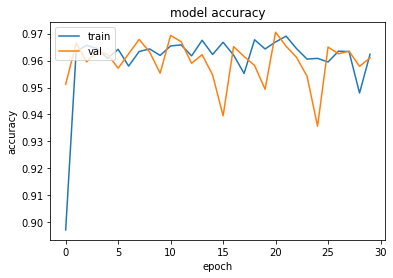

In [209]:
import matplotlib.pyplot as  plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

Ve do thi hoc voi loss

<function matplotlib.pyplot.show(*args, **kw)>

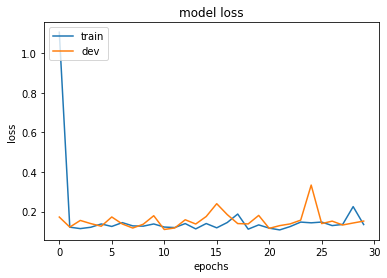

In [210]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','dev'],loc='upper left')
plt.show

$.4. Xây dựng mạng LeNet-5

In [211]:
model2 = Sequential()
model2.add(Conv2D(filters=6, kernel_size=(5,5), padding='same',
activation='relu',input_shape=(28,28,1)))
model2.add(AveragePooling2D(strides=2, pool_size=(2, 2)))
model2.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid',
activation='relu'))
model2.add(AveragePooling2D(strides=2, pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(120, activation='relu'))
model2.add(Dense(84, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [212]:
model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_8 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_51 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_9 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_19 (Flatten)        (None, 400)               0         
                                                                 
 dense_35 (Dense)            (None, 120)             

In [213]:
optimizer = Adam(learning_rate=5e-4)
loss = CategoricalCrossentropy()
model2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [214]:
history2 = model2.fit(X_train_expanded, y_train_new,
batch_size=128, epochs=30,
validation_data=(X_dev_expanded,y_dev_new))

Epoch 1/30
422/422 [==============================] - 3s 5ms/step - loss: 0.5781 - accuracy: 0.8786 - val_loss: 0.1413 - val_accuracy: 0.9587
Epoch 2/30
422/422 [==============================] - 2s 4ms/step - loss: 0.1000 - accuracy: 0.9698 - val_loss: 0.1002 - val_accuracy: 0.9710
Epoch 3/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0656 - accuracy: 0.9795 - val_loss: 0.0826 - val_accuracy: 0.9755
Epoch 4/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.0779 - val_accuracy: 0.9768
Epoch 5/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0364 - accuracy: 0.9886 - val_loss: 0.0665 - val_accuracy: 0.9808
Epoch 6/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0687 - val_accuracy: 0.9783
Epoch 7/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0262 - accuracy: 0.9917 - val_loss: 0.0691 - val_accuracy: 0.9822
Epoch 

<function matplotlib.pyplot.show(*args, **kw)>

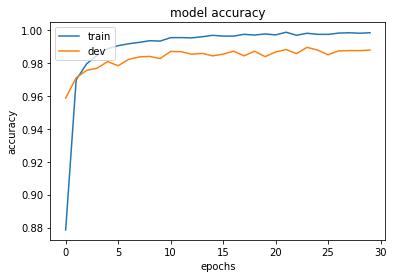

In [215]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','dev'],loc='upper left')
plt.show

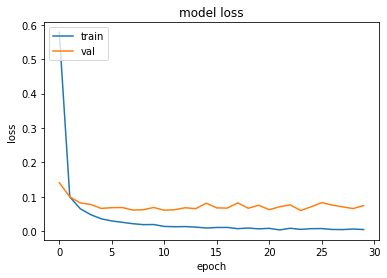

In [216]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [217]:
y_pred = model2.predict(X_test_expanded)
y_pred = np.argmax(y_pred , axis = -1)

313/313 [==============================] - 1s 3ms/step


In [218]:
accuracy_score(y_pred,y_test)*100

98.8

5. Ví dụ áp dụng: Xây dựng mạng AlexNet

In [219]:
model3 = Sequential()
model3.add(Conv2D(filters=96, kernel_size=(11,11),strides=(4,4) ,padding='same',activation='relu',input_shape=(28,28,1)))
model3.add(MaxPooling2D(strides=(2,2), pool_size=(3, 3),padding='same'))
model3.add(Conv2D(filters=256, kernel_size=(5,5), padding='same',activation='relu'))
model3.add(MaxPooling2D(strides=(2,2), pool_size=(3, 3), padding='same'))
model3.add(Conv2D(filters=384, kernel_size=(3,3),strides=(1,1), padding='same',activation='relu'))
model3.add(Conv2D(filters=384, kernel_size=(3,3),strides=(1,1), padding='same',activation='relu'))
model3.add(Conv2D(filters=256, kernel_size=(3,3),strides=(1,1), padding='same',activation='relu'))
model3.add(MaxPooling2D(strides=(2,2), pool_size=(3, 3), padding='same'))
model3.add(Flatten())
model3.add(Dense(4096, activation='relu'))
model3.add(Dense(4096, activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [220]:
model3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 7, 7, 96)          11712     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 4, 4, 96)         0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 2, 2, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 2, 2, 384)         885120    
                                                                 
 conv2d_55 (Conv2D)          (None, 2, 2, 384)       

In [221]:
optimizer = Adam(learning_rate=5e-4)
loss = CategoricalCrossentropy()
model3.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [222]:
from keras.callbacks import EarlyStopping 
callback =EarlyStopping (monitor='val_loss',patience=1)

In [223]:
history3 = model3.fit(X_train_expanded, y_train_new,
batch_size=128, epochs=30,
validation_data=(X_dev_expanded,y_dev_new),callbacks=callback)

Epoch 1/30
422/422 [==============================] - 10s 22ms/step - loss: 0.3847 - accuracy: 0.8823 - val_loss: 0.1106 - val_accuracy: 0.9693
Epoch 2/30
422/422 [==============================] - 8s 20ms/step - loss: 0.0884 - accuracy: 0.9743 - val_loss: 0.0826 - val_accuracy: 0.9765
Epoch 3/30
422/422 [==============================] - 8s 19ms/step - loss: 0.0648 - accuracy: 0.9811 - val_loss: 0.0938 - val_accuracy: 0.9773


<function matplotlib.pyplot.show(*args, **kw)>

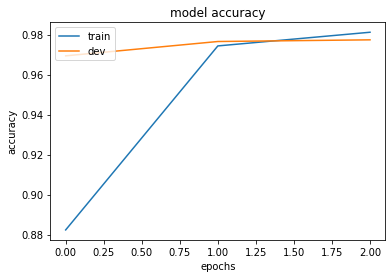

In [224]:
import matplotlib.pyplot as plt
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','dev'],loc='upper left')
plt.show

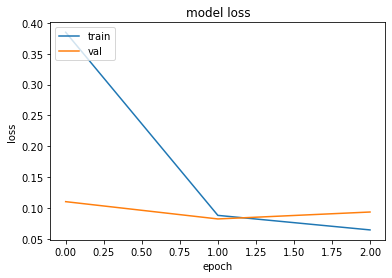

In [225]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [226]:
y_pred = model3.predict(X_test_expanded)
y_pred_label = np.argmax(y_pred,axis=-1)

313/313 [==============================] - 1s 3ms/step


In [227]:
accuracy_score(y_test, y_pred_label)*100

97.91

Bài tập 1

a. Xây dựng lại mô hình mạng CNN như hướng dẫn ở Mục 3, tuy nhiên sử dụng hàm kích hoạt ReLU cho hai lớp CONV.

b. Tiến hành huấn luyện mô hình, sau đó vẽ đồ thị học với accuracy và loss.

c. Đánh giá mô hình trên tập test và cho biết độ chính xác dự đoán

In [228]:
model_1 = Sequential()
model_1.add(Input(shape = (28,28,1)))
model_1.add(Conv2D(32,padding = "valid", kernel_size = (3,3), activation = "relu"))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Conv2D(64,kernel_size = (3,3),activation = "relu"))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Flatten())
model_1.add(Dense(10,activation= "softmax"))

In [229]:
model_1.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 1600)              0         
                                                                 
 dense_41 (Dense)            (None, 10)              

In [230]:
optimizer = Adam(learning_rate = 0.01)
loss = CategoricalCrossentropy()
model_1.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [231]:
history_1 = model_1.fit(X_train_expanded, y_train_new,batch_size=128, epochs=30,validation_data=(X_dev_expanded,y_dev_new))

Epoch 1/30
422/422 [==============================] - 3s 5ms/step - loss: 1.9308 - accuracy: 0.8807 - val_loss: 0.1892 - val_accuracy: 0.9502
Epoch 2/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1234 - accuracy: 0.9621 - val_loss: 0.1544 - val_accuracy: 0.9563
Epoch 3/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1150 - accuracy: 0.9654 - val_loss: 0.1473 - val_accuracy: 0.9600
Epoch 4/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1047 - accuracy: 0.9685 - val_loss: 0.1357 - val_accuracy: 0.9638
Epoch 5/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1043 - accuracy: 0.9681 - val_loss: 0.1187 - val_accuracy: 0.9675
Epoch 6/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1004 - accuracy: 0.9697 - val_loss: 0.1046 - val_accuracy: 0.9688
Epoch 7/30
422/422 [==============================] - 2s 5ms/step - loss: 0.0937 - accuracy: 0.9711 - val_loss: 0.1432 - val_accuracy: 0.9657
Epoch 

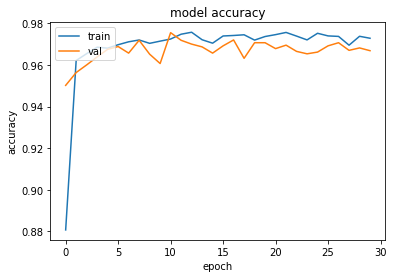

In [232]:
import matplotlib.pyplot as  plt
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

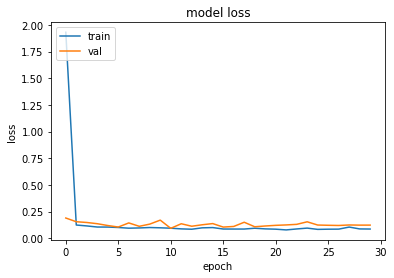

In [233]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [234]:
y_pred = model_1.predict(X_test_expanded)
y_pred = np.argmax(y_pred, axis = -1)
accuracy_score(y_test, y_pred )*100

313/313 [==============================] - 1s 2ms/step


96.76

Bài tập 2

a. Xây dựng lại mô hình mạng CNN như hướng dẫn ở Mục 3, tuy nhiên sử dụng hàm kích hoạt Tanh cho hai lớp CONV.

b. Tiến hành huấn luyện mô hình, sau đó vẽ đồ thị học với accuracy và loss.

c. Đánh giá mô hình trên tập test và cho biết độ chính xác dự đoán

In [235]:
model_2 = Sequential()
model_2.add (Input(shape=(28,28,1)))
model_2.add(Conv2D(32,padding="valid",kernel_size=(3,3),activation="tanh"))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(64,kernel_size=(3,3),activation='tanh'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Flatten())
model_2.add(Dense(10,activation='softmax'))

In [236]:
model_2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_22 (Flatten)        (None, 1600)              0         
                                                                 
 dense_42 (Dense)            (None, 10)              

In [237]:
optimizer = Adam(learning_rate = 0.01)
loss = CategoricalCrossentropy()
model_2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [238]:
history_2 = model_2.fit(X_train_expanded, y_train_new,batch_size=128, epochs=30,validation_data=(X_dev_expanded,y_dev_new))

Epoch 1/30
422/422 [==============================] - 3s 6ms/step - loss: 0.2224 - accuracy: 0.9408 - val_loss: 0.1617 - val_accuracy: 0.9627
Epoch 2/30
422/422 [==============================] - 2s 6ms/step - loss: 0.2111 - accuracy: 0.9578 - val_loss: 0.2559 - val_accuracy: 0.9597
Epoch 3/30
422/422 [==============================] - 3s 6ms/step - loss: 0.2433 - accuracy: 0.9608 - val_loss: 0.3489 - val_accuracy: 0.9540
Epoch 4/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2817 - accuracy: 0.9610 - val_loss: 0.4348 - val_accuracy: 0.9522
Epoch 5/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2712 - accuracy: 0.9654 - val_loss: 0.3342 - val_accuracy: 0.9585
Epoch 6/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2860 - accuracy: 0.9653 - val_loss: 0.3494 - val_accuracy: 0.9677
Epoch 7/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2946 - accuracy: 0.9664 - val_loss: 0.4800 - val_accuracy: 0.9557
Epoch 

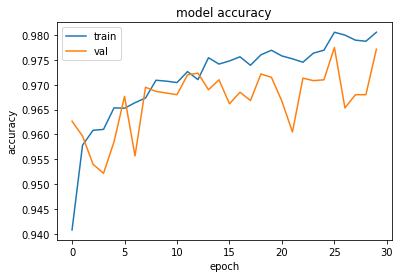

In [239]:
import matplotlib.pyplot as  plt
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

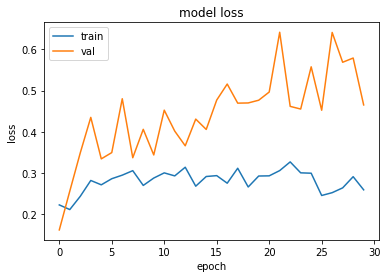

In [240]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [241]:
y_pred = model_2.predict(X_test_expanded)
y_pred = np.argmax(y_pred, axis = -1)
accuracy_score(y_test, y_pred )*100

313/313 [==============================] - 1s 2ms/step


97.89

Bài tập 3

a. Thực hiện tương tự như Bài tập 1, nhưng thêm lớp Dropout với giá trị p = 0.5 vào trước lớp Dense.

b. Sử dụng lệnh summary và cho biết cấu trúc của mô hình đã xây dựng.

c. Tiến hành huấn luyện mô hình, sau đó vẽ đồ thị học với accuracy và loss.

d. Đánh giá mô hình trên tập test và cho biết độ chính xác dự đoán.

e. Lưu lại mô hình thành file có định dạng .h5.

In [242]:
model_3 = Sequential()
model_3.add(Input(shape = (28,28,1)))
model_3.add(Conv2D(32,padding = "valid", kernel_size = (3,3), activation = "relu"))
model_3.add(MaxPooling2D(pool_size = (2,2)))
model_3.add(Conv2D(64,kernel_size = (3,3),activation = "relu"))
model_3.add(MaxPooling2D(pool_size = (2,2)))
model_3.add(Flatten())
model_3.add(Dropout( 0.5))
model_3.add(Dense(10,activation= "softmax"))

In [243]:
model_3.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)            

In [244]:
optimizer = Adam(learning_rate = 0.01)
loss = CategoricalCrossentropy()
model_3.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [245]:
history_3 = model_3.fit(X_train_expanded, y_train_new,batch_size=128, epochs=30,validation_data=(X_dev_expanded,y_dev_new))

Epoch 1/30
422/422 [==============================] - 3s 6ms/step - loss: 0.9766 - accuracy: 0.8324 - val_loss: 0.1407 - val_accuracy: 0.9597
Epoch 2/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2886 - accuracy: 0.9118 - val_loss: 0.1189 - val_accuracy: 0.9652
Epoch 3/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2624 - accuracy: 0.9200 - val_loss: 0.1498 - val_accuracy: 0.9577
Epoch 4/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2544 - accuracy: 0.9232 - val_loss: 0.1162 - val_accuracy: 0.9662
Epoch 5/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2088 - accuracy: 0.9362 - val_loss: 0.1039 - val_accuracy: 0.9705
Epoch 6/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2078 - accuracy: 0.9371 - val_loss: 0.1186 - val_accuracy: 0.9628
Epoch 7/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2035 - accuracy: 0.9389 - val_loss: 0.0833 - val_accuracy: 0.9752
Epoch 

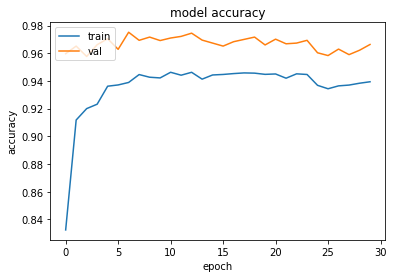

In [246]:
import matplotlib.pyplot as  plt
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

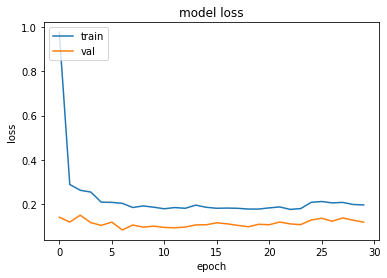

In [247]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [248]:
y_pred = model_3.predict(X_test_expanded)
y_pred = np.argmax(y_pred, axis = -1)
accuracy_score(y_test, y_pred )*100

313/313 [==============================] - 1s 2ms/step


96.66

In [249]:
model_3.save('/content/drive/MyDrive/DS201/20521342_Baitap3.h5' )

Bài tập 4*

a. Tìm hiểu cấu trúc và xây dựng lại mạng ZFNET.

b. Sử dụng lệnh summary và cho biết cấu trúc của mô hình đã xây dựng.

c. Tiến hành huấn luyện mô hình với các thông số dưới đây, sau đó vẽ đồ thị học với accuracy và loss.

● Hàm loss: CategoricalCrossentropy.

● Hàm tối ưu: Adam, learning_rate=5e-4.

● Độ đo đánh giá: Accuracy.

● Batch_size: 256.

● Epochs: 30.

Trong quá trình huấn luyện có sử dụng kĩ thuật Early Stopping với các thông số sau:

● monitor='val_loss'.

● patience=1.

In [250]:
model_4 = Sequential()
model_4.add(Conv2D(filters=96,kernel_size = (7,7), activation ='relu',input_shape=(28,28,1) ))
model_4.add(MaxPooling2D(pool_size=(5,5),padding='same',strides=(2,2)))
model_4.add(Conv2D(filters=256,kernel_size=(5,5),strides=(2,2),activation ='relu'))
model_4.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same'))
model_4.add(Conv2D(filters=384,kernel_size=(3,3),padding='same',strides=(1,1),activation='relu'))
model_4.add(Conv2D(filters=384,kernel_size=(3,3),padding='same',strides=(1,1),activation='relu'))
model_4.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',strides=(1,1),activation='relu'))
model_4.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same'))
model_4.add(Flatten())
model_4.add(Dense(4096,activation='relu'))
model_4.add(Dense(4096,activation='relu'))
model_4.add(Dense(10,activation='softmax'))

In [251]:
model_4.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 22, 22, 96)        4800      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 11, 11, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 2, 2, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 2, 2, 384)         885120    
                                                                 
 conv2d_66 (Conv2D)          (None, 2, 2, 384)       

In [252]:
optimizer = Adam(learning_rate = 5e-4)
loss = CategoricalCrossentropy()
model_4.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [253]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor="val_loss", patience=1)

In [254]:
history_4 = model_4.fit(X_train_expanded, y_train_new,batch_size=256, epochs=30,validation_data=(X_dev_expanded,y_dev_new),callbacks = callback)

Epoch 1/30
211/211 [==============================] - 10s 41ms/step - loss: 0.4531 - accuracy: 0.8765 - val_loss: 0.1040 - val_accuracy: 0.9678
Epoch 2/30
211/211 [==============================] - 8s 40ms/step - loss: 0.0609 - accuracy: 0.9819 - val_loss: 0.0759 - val_accuracy: 0.9773
Epoch 3/30
211/211 [==============================] - 9s 41ms/step - loss: 0.0438 - accuracy: 0.9867 - val_loss: 0.0478 - val_accuracy: 0.9858
Epoch 4/30
211/211 [==============================] - 9s 41ms/step - loss: 0.0325 - accuracy: 0.9903 - val_loss: 0.0483 - val_accuracy: 0.9878


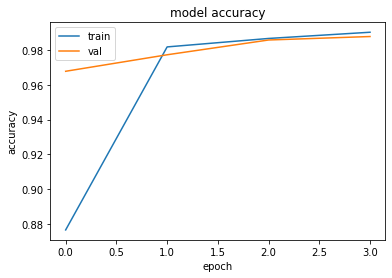

In [255]:
import matplotlib.pyplot as  plt
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

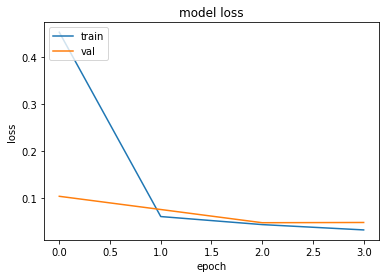

In [256]:
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [257]:
y_pred = model_4.predict(X_test_expanded)
y_pred = np.argmax(y_pred, axis = -1)
accuracy_score(y_test, y_pred )*100

313/313 [==============================] - 1s 3ms/step


98.89